In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime

import plotly.express as px
from jinja2 import Template

In [2]:
df = pd.read_excel('ph100_timeseries2014.xlsx', 'Sheet3')

In [5]:
cf = pd.read_excel('ph100_timeseries2014.xlsx', 'Sheet2')

In [6]:
df['date'] = df['TIME'].map(lambda x : x.replace("T", " ").split(" ")[0])
# df['date'] = df['date']..map(lambda x : x)
df.head(3)

TIME  DEPTH  BOT_DEPTH  PRES_REL     TEMP     PSAL  \
0  2014-04-27T23:35:58  0.993         89         1  23.1977  35.2731   
1  2014-04-27T23:35:58  1.986         89         2  23.2048  35.2718   
2  2014-04-27T23:35:58  2.979         89         3  23.2073  35.2722   

       DOX2    TURB    CHLF    CNDC   DESC       DENS        date  
0  221.9289  0.0814  1.5030  5.1553 -0.038  1024.0876  2014-04-27  
1  222.6788  0.0901  1.4879  5.1559  0.376  1024.0907  2014-04-27  
2  222.6522  0.0966  1.5334  5.1563  0.669  1024.0931  2014-04-27

In [7]:
cf['date'] = cf['TIME'].map(lambda x : x.replace("T", " ").split(" ")[0])
cf.head(3)

Station_name  Num_ID  year             Sample name                 TIME  \
0        PH100       4  2014   PH100 29 apr 2014 0m   2014-04-27T23:35:58   
1        PH100       4  2014  PH100 29 apr 2014 10m   2014-04-27T23:35:58   
2        PH100       4  2014  PH100 29 apr 2014 20m   2014-04-27T23:35:58   

   month  day  Sampled_depth  Sampled_depth.1  Pressure  ...  \
0      4   28              0                0         1  ...   
1      4   28             10               10        10  ...   
2      4   28             20               20        20  ...   

   Kd490_MODL2_1D_1km  Kd490_MODL2_8Dmean_1km  Kd490_MODL2_8Dstd_1km  \
0                 NaN                0.076067               0.004197   
1                 NaN                0.076067               0.004197   
2                 NaN                0.076067               0.004197   

   Daylength  Optical_water_type    ozonex    pressatmx      solzx      solax  \
0  10.666685                 1.0  0.266768  1021.346741  61.999977 -46.055511   
1  10.666685                 1.0  0.266768  1021.346741  61.999977 -46.055511   
2  10.666685                 1.0  0.266768  1021.346741  61.999977 -46.055511   

         date  
0  2014-04-27  
1  2014-04-27  
2  2014-04-27  

[3 rows x 64 columns]

In [8]:
df["DOX2"].interpolate(method="linear", direction = "forward", inplace=True)

In [9]:
df.isna().sum()

TIME         0
DEPTH        0
BOT_DEPTH    0
PRES_REL     0
TEMP         0
PSAL         0
DOX2         0
TURB         0
CHLF         0
CNDC         0
DESC         0
DENS         0
date         0
dtype: int64

In [10]:
df.describe()

DEPTH    BOT_DEPTH     PRES_REL         TEMP         PSAL  \
count  1480.000000  1480.000000  1480.000000  1480.000000  1480.000000   
mean     46.821278    92.206757    47.164865    18.074358    35.479267   
std      26.583903     2.642649    26.781082     2.005006     0.096290   
min       0.993000    84.000000     1.000000    14.394400    35.162600   
25%      23.827000    91.000000    24.000000    16.805275    35.404175   
50%      46.659000    93.000000    47.000000    17.598450    35.490750   
75%      69.489000    94.000000    70.000000    19.322475    35.553600   
max      94.301000    95.000000    95.000000    23.207300    35.656700   

              DOX2         TURB         CHLF         CNDC         DESC  \
count  1480.000000  1480.000000  1480.000000  1480.000000  1480.000000   
mean    215.268313     0.162532     2.044183     4.656831     0.727803   
std      21.407756     0.144137     2.252538     0.204815     0.185351   
min     176.546400     0.051900    -0.035500     4.266800    -0.162000   
25%     199.305225     0.085950     0.582775     4.528250     0.640000   
50%     216.039100     0.132000     1.324950     4.619700     0.740000   
75%     232.993200     0.185600     2.693500     4.769525     0.834000   
max     257.097500     1.663200    18.178400     5.196200     1.365000   

              DENS  
count  1480.000000  
mean   1025.796225  
std       0.591173  
min    1024.087600  
25%    1025.470400  
50%    1025.929400  
75%    1026.230700  
max    1026.786000

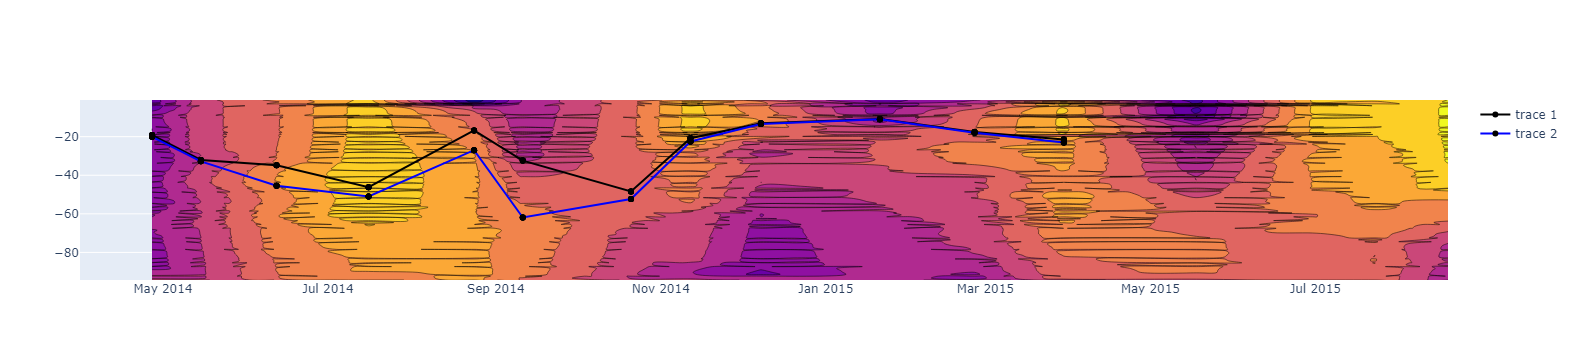

In [11]:
# Create figure with MLD line
fig = go.Figure()

fig.add_trace(
    go.Contour(
        z=df.PSAL,
        x=df.date, # horizontal axis
        y=-df.DEPTH, # vertical axis
        # ncontours=30,
        showscale=False,
    )
)

fig.add_trace(
    go.Scatter(
        x=cf.date,
        y=-cf.MLD_CD06,
        mode="markers+lines",
        # name="steepest",
        line=dict(
            color="black"
        )
    )
)

fig.add_trace(
    go.Scatter(
        x=cf.date,
        y=-cf.MLD_sig125,
        mode="markers+lines",
        # name="steepest",
        line=dict(
            color="blue"
        ),
        marker=dict(
            color='black'
        )
    )
)
fig.show()

In [20]:
# fig = go.Figure(data =
#     go.Contour(
#         z=df.PSAL,
#         x=df.date, # horizontal axis
#         y=-df.DEPTH, # vertical axis
#         line_smoothing=0.85,
#         colorscale = 'Jet',
#         # contours=dict(
#         #     start=0,
#         #     end=8,
#         #     size=2,
#         # ),
#         contours = dict(
#             showlabels = True,
#             labelfont = dict(
#                 family = 'Raleway',
#                 color = 'white'
#             )
#         ),
#         hoverlabel = dict(
#             bgcolor = 'white',
#             bordercolor = 'black',
#             font = dict(
#                 family = 'Raleway',
#                 color = 'black'
#             )
#         )
#     ))
# fig.add_trace(
#     go.Scatter(
#         x=cf.date,
#         y=-cf.MLD_CD06,
#         mode="markers+lines",
#         # name="steepest",
#         line=dict(
#             color="black"
#         )
#     )
# )
# fig.update_xaxes(range=['2014-04-26','2015-03-31'])
# output_html_path = r"output.html"
# input_template_path = r"template.html"

# plotly_jinja_data = {"fig":fig.to_html(full_html=False, include_plotlyjs = True, default_width='100%', default_height='100%')}
# #consider also defining the include_plotlyjs parameter to point to an external Plotly.js as described above

# with open(output_html_path, "w", encoding="utf-8") as output_file:
#     with open(input_template_path) as template_file:
#         j2_template = Template(template_file.read())
#         output_file.write(j2_template.render(plotly_jinja_data))

# # fig.write_html("salinity.html")
# # fig.show()

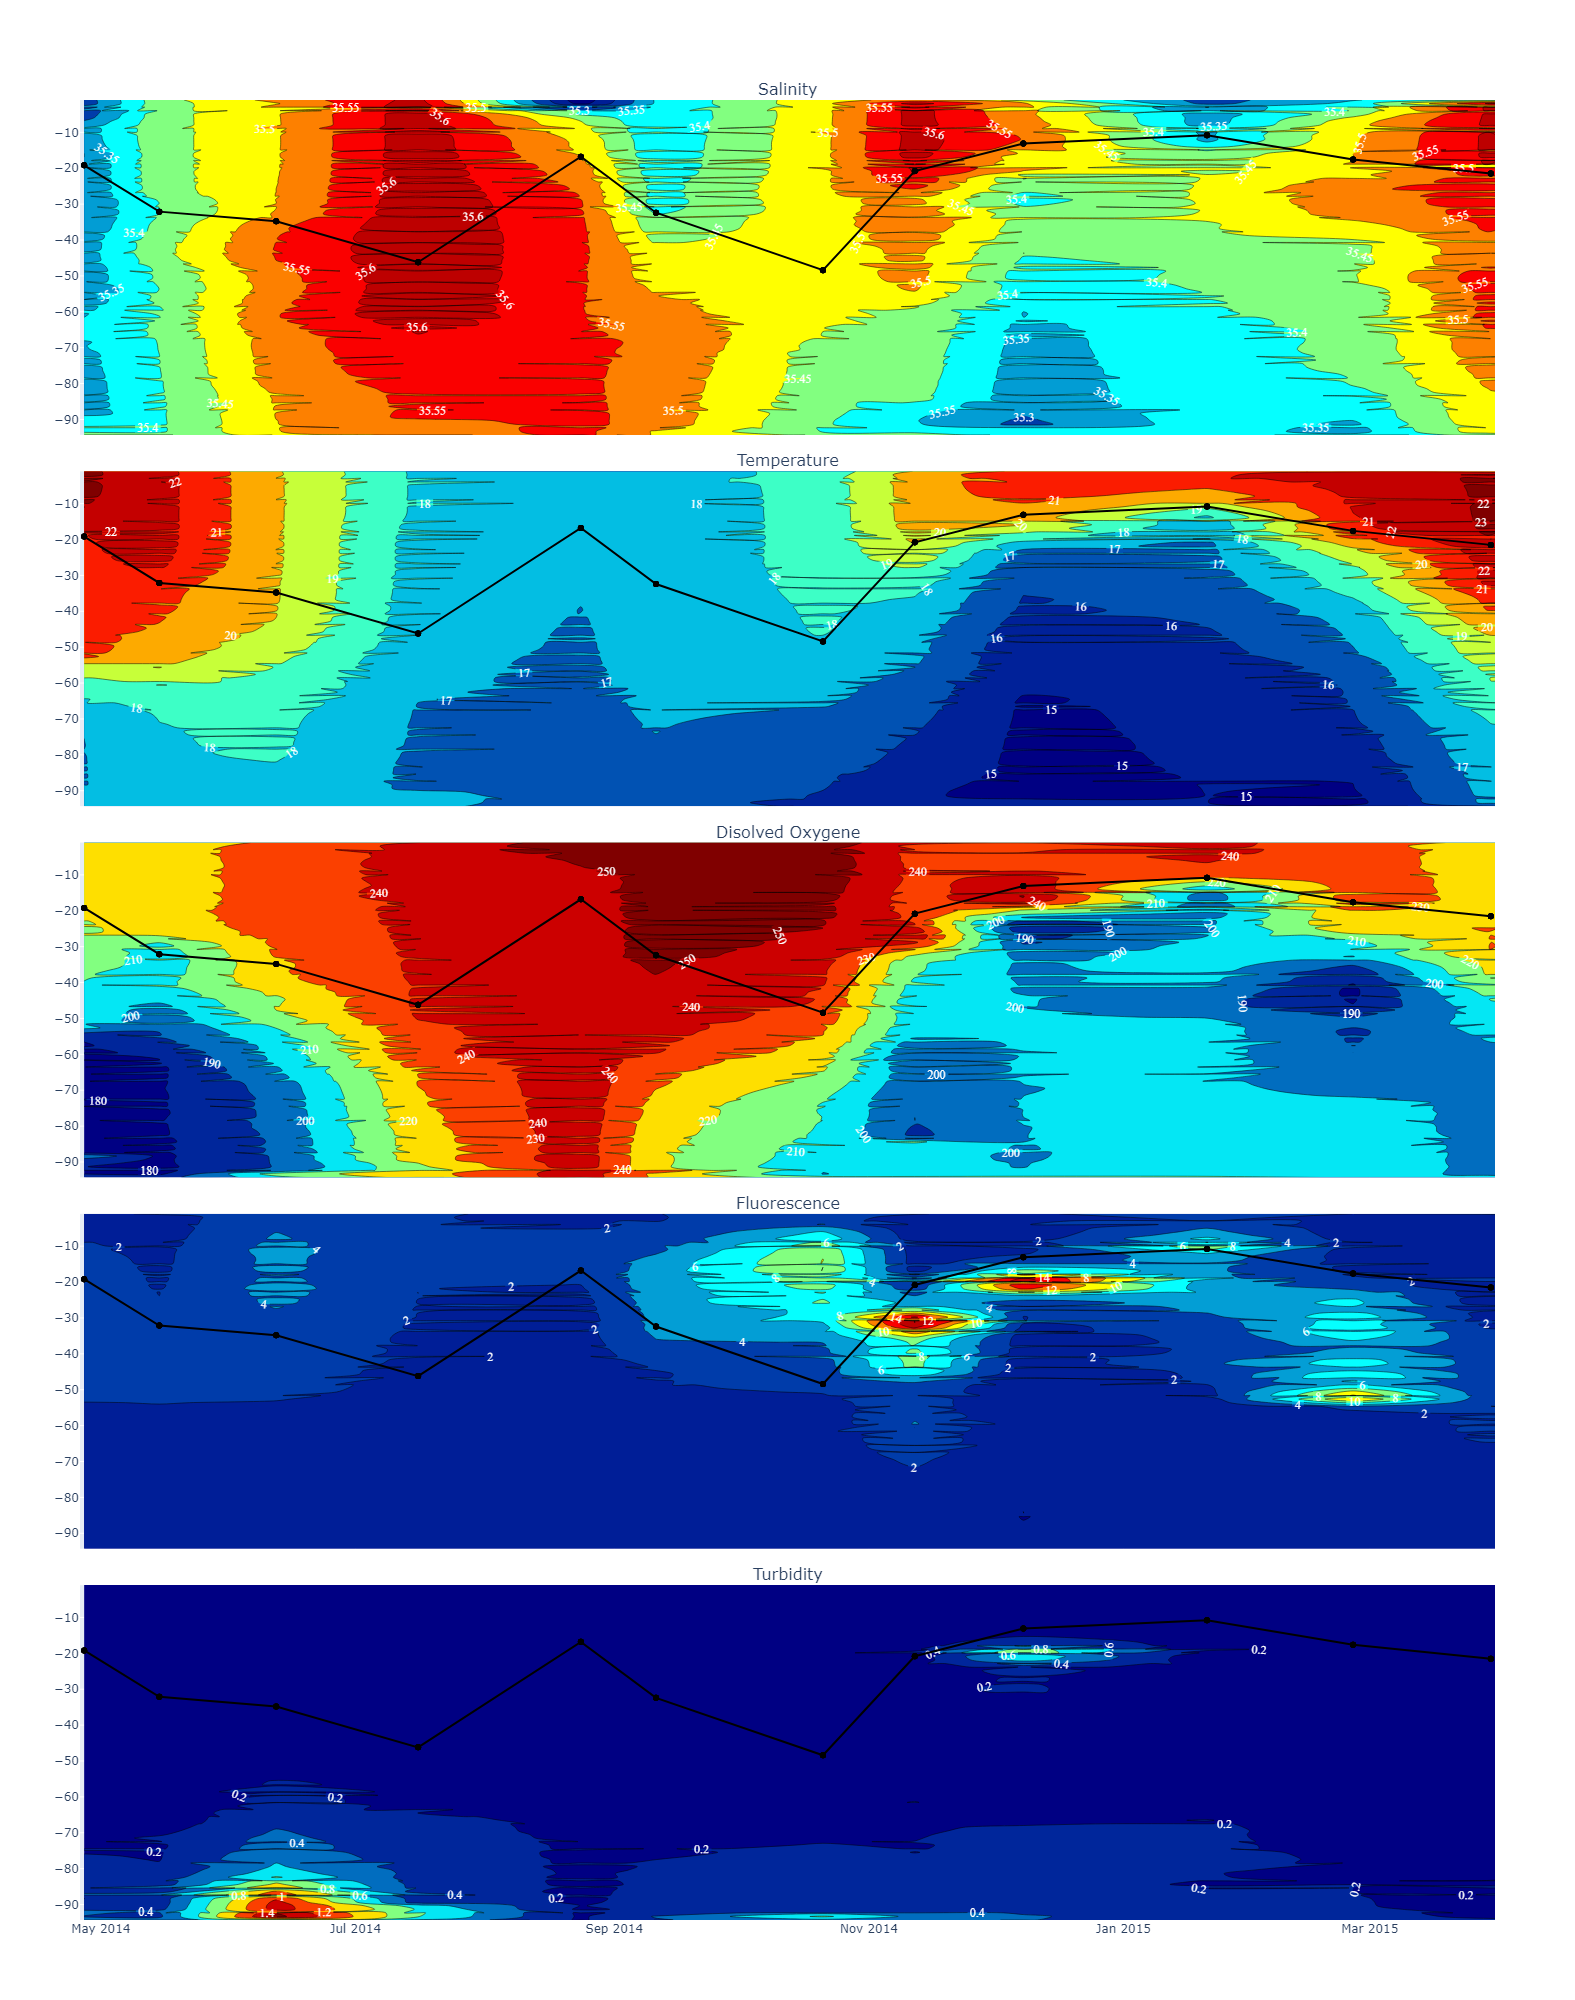

In [12]:
#making profiles of the water column based on CTD data and saving it on different formats
fig = make_subplots(rows=5, cols=1,
                    shared_xaxes = True,
                    vertical_spacing=0.02,
                    subplot_titles=('Salinity', 'Temperature', 'Disolved Oxygene', 'Fluorescence', 'Turbidity',
                                   )
                   )
fig.add_trace(
    go.Contour(
        z=df.PSAL,
        x=df.date, # horizontal axis
        y=-df.DEPTH, # vertical axis
        line_smoothing=0.85,
        colorscale = 'Jet',
        showscale=False,
        # contours=dict(
        #     start=0,
        #     end=8,
        #     size=2,
        # ),
        contours = dict(
            showlabels = True,
            labelfont = dict(
                family = 'Raleway',
                color = 'white'
            )
        ),
        hoverlabel = dict(
            bgcolor = 'white',
            bordercolor = 'black',
            font = dict(
                family = 'Raleway',
                color = 'black'
            )
        )
    ), 1, 1
)

fig.add_trace(
    go.Scatter(
        x=cf.date,
        y=-cf.MLD_CD06,
        mode="markers+lines",
        # name="steepest",
        line=dict(
            color="black"
        )
    ), 1, 1
)
fig.add_trace(
    go.Contour(
        z=df.TEMP,
        x=df.date, # horizontal axis
        y=-df.DEPTH, # vertical axis
        line_smoothing=0.85,
        colorscale = 'Jet',
        showscale=False,
        # contours=dict(
        #     start=0,
        #     end=8,
        #     size=2,
        # ),
        contours = dict(
            showlabels = True,
            labelfont = dict(
                family = 'Raleway',
                color = 'white'
            )
        ),
        hoverlabel = dict(
            bgcolor = 'white',
            bordercolor = 'black',
            font = dict(
                family = 'Raleway',
                color = 'black'
            )
        )
    ), 2, 1
)


fig.add_trace(
    go.Scatter(
        x=cf.date,
        y=-cf.MLD_CD06,
        mode="markers+lines",
        # name="steepest",
        line=dict(
            color="black"
        )
    ), 2, 1
)
fig.add_trace(
    go.Contour(
        z=df.DOX2,
        x=df.date, # horizontal axis
        y=-df.DEPTH, # vertical axis
        line_smoothing=0.85,
        colorscale = 'Jet',
        showscale=False,
        # contours=dict(
        #     start=0,
        #     end=8,
        #     size=2,
        # ),
        contours = dict(
            showlabels = True,
            labelfont = dict(
                family = 'Raleway',
                color = 'white'
            )
        ),
        hoverlabel = dict(
            bgcolor = 'white',
            bordercolor = 'black',
            font = dict(
                family = 'Raleway',
                color = 'black'
            )
        )
    ), 3, 1
)


fig.add_trace(
    go.Scatter(
        x=cf.date,
        y=-cf.MLD_CD06,
        mode="markers+lines",
        # name="steepest",
        line=dict(
            color="black"
        )
    ), 3, 1
)
fig.add_trace(
    go.Contour(
        z=df.CHLF,
        x=df.date, # horizontal axis
        y=-df.DEPTH, # vertical axis
        line_smoothing=0.85,
        colorscale = 'Jet',
        showscale=False,
        # contours=dict(
        #     start=0,
        #     end=8,
        #     size=2,
        # ),
        contours = dict(
            showlabels = True,
            labelfont = dict(
                family = 'Raleway',
                color = 'white'
            )
        ),
        hoverlabel = dict(
            bgcolor = 'white',
            bordercolor = 'black',
            font = dict(
                family = 'Raleway',
                color = 'black'
            )
        )
    ), 4, 1
)
fig.add_trace(
    go.Scatter(
        x=cf.date,
        y=-cf.MLD_CD06,
        mode="markers+lines",
        # name="steepest",
        line=dict(
            color="black"
        )
    ), 4, 1
)
fig.add_trace(
    go.Contour(
        z=df.TURB,
        x=df.date, # horizontal axis
        y=-df.DEPTH, # vertical axis
        line_smoothing=0.85,
        colorscale = 'Jet',
        showscale=False,
        # contours=dict(
        #     start=0,
        #     end=8,
        #     size=2,
        # ),
        contours = dict(
            showlabels = True,
            labelfont = dict(
                family = 'Raleway',
                color = 'white'
            )
        ),
        hoverlabel = dict(
            bgcolor = 'white',
            bordercolor = 'black',
            font = dict(
                family = 'Raleway',
                color = 'black'
            )
        )
    ), 5, 1
)


fig.add_trace(
    go.Scatter(
        x=cf.date,
        y=-cf.MLD_CD06,
        mode="markers+lines",
        # name="steepest",
        line=dict(
            color="black"
        )
    ), 5, 1
)

fig.update_xaxes(range=['2014-04-26','2015-03-31'])
fig.update_layout(showlegend=False)
fig.update_layout(
    autosize=False,
    width=1200,
    height=2000,
)
fig.write_image("ctd_plots.jpeg")
fig.write_image("ctd_plots.pdf")
fig.write_image("ctd_plots.webp")
fig.write_html("plots.html")
fig.show()

In [13]:
#this is the same figure but it provides an output.html file that can be added to a webpage

fig = make_subplots(rows=5, cols=1,
                    shared_xaxes = True,
                    vertical_spacing=0.02,
                    subplot_titles=('Salinity', 'Temperature', 'Disolved Oxygene', 'Fluorescence', 'Turbidity',
                                   )
                   )
fig.add_trace(
    go.Contour(
        z=df.PSAL,
        x=df.date, # horizontal axis
        y=-df.DEPTH, # vertical axis
        line_smoothing=0.85,
        colorscale = 'Jet',
        showscale=False,
        # contours=dict(
        #     start=0,
        #     end=8,
        #     size=2,
        # ),
        contours = dict(
            showlabels = True,
            labelfont = dict(
                family = 'Raleway',
                color = 'white'
            )
        ),
        hoverlabel = dict(
            bgcolor = 'white',
            bordercolor = 'black',
            font = dict(
                family = 'Raleway',
                color = 'black'
            )
        )
    ), 1, 1
)

fig.add_trace(
    go.Scatter(
        x=cf.date,
        y=-cf.MLD_CD06,
        mode="markers+lines",
        # name="steepest",
        line=dict(
            color="black"
        )
    ), 1, 1
)
fig.add_trace(
    go.Contour(
        z=df.TEMP,
        x=df.date, # horizontal axis
        y=-df.DEPTH, # vertical axis
        line_smoothing=0.85,
        colorscale = 'Jet',
        showscale=False,
        # contours=dict(
        #     start=0,
        #     end=8,
        #     size=2,
        # ),
        contours = dict(
            showlabels = True,
            labelfont = dict(
                family = 'Raleway',
                color = 'white'
            )
        ),
        hoverlabel = dict(
            bgcolor = 'white',
            bordercolor = 'black',
            font = dict(
                family = 'Raleway',
                color = 'black'
            )
        )
    ), 2, 1
)


fig.add_trace(
    go.Scatter(
        x=cf.date,
        y=-cf.MLD_CD06,
        mode="markers+lines",
        # name="steepest",
        line=dict(
            color="black"
        )
    ), 2, 1
)
fig.add_trace(
    go.Contour(
        z=df.DOX2,
        x=df.date, # horizontal axis
        y=-df.DEPTH, # vertical axis
        line_smoothing=0.85,
        colorscale = 'Jet',
        showscale=False,
        # contours=dict(
        #     start=0,
        #     end=8,
        #     size=2,
        # ),
        contours = dict(
            showlabels = True,
            labelfont = dict(
                family = 'Raleway',
                color = 'white'
            )
        ),
        hoverlabel = dict(
            bgcolor = 'white',
            bordercolor = 'black',
            font = dict(
                family = 'Raleway',
                color = 'black'
            )
        )
    ), 3, 1
)


fig.add_trace(
    go.Scatter(
        x=cf.date,
        y=-cf.MLD_CD06,
        mode="markers+lines",
        # name="steepest",
        line=dict(
            color="black"
        )
    ), 3, 1
)
fig.add_trace(
    go.Contour(
        z=df.CHLF,
        x=df.date, # horizontal axis
        y=-df.DEPTH, # vertical axis
        line_smoothing=0.85,
        colorscale = 'Jet',
        showscale=False,
        # contours=dict(
        #     start=0,
        #     end=8,
        #     size=2,
        # ),
        contours = dict(
            showlabels = True,
            labelfont = dict(
                family = 'Raleway',
                color = 'white'
            )
        ),
        hoverlabel = dict(
            bgcolor = 'white',
            bordercolor = 'black',
            font = dict(
                family = 'Raleway',
                color = 'black'
            )
        )
    ), 4, 1
)
fig.add_trace(
    go.Scatter(
        x=cf.date,
        y=-cf.MLD_CD06,
        mode="markers+lines",
        # name="steepest",
        line=dict(
            color="black"
        )
    ), 4, 1
)
fig.add_trace(
    go.Contour(
        z=df.TURB,
        x=df.date, # horizontal axis
        y=-df.DEPTH, # vertical axis
        line_smoothing=0.85,
        colorscale = 'Jet',
        showscale=False,
        # contours=dict(
        #     start=0,
        #     end=8,
        #     size=2,
        # ),
        contours = dict(
            showlabels = True,
            labelfont = dict(
                family = 'Raleway',
                color = 'white'
            )
        ),
        hoverlabel = dict(
            bgcolor = 'white',
            bordercolor = 'black',
            font = dict(
                family = 'Raleway',
                color = 'black'
            )
        )
    ), 5, 1
)


fig.add_trace(
    go.Scatter(
        x=cf.date,
        y=-cf.MLD_CD06,
        mode="markers+lines",
        # name="steepest",
        line=dict(
            color="black"
        )
    ), 5, 1
)

fig.update_xaxes(range=['2014-04-26','2015-03-31'])
fig.update_layout(showlegend=False)
fig.update_layout(
    autosize=False,
    width=800,
    height=1800,
)
output_html_path = r"output.html"
input_template_path = r"template.html"

plotly_jinja_data = {"fig":fig.to_html(full_html=False, include_plotlyjs = True, default_width='100%', default_height='100%')}
#consider also defining the include_plotlyjs parameter to point to an external Plotly.js as described above

with open(output_html_path, "w", encoding="utf-8") as output_file:
    with open(input_template_path) as template_file:
        j2_template = Template(template_file.read())
        output_file.write(j2_template.render(plotly_jinja_data))